In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 10.40 MiB/s, done.
Updating files: 100% (4/4), done.


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
import pickle
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import random


In [ ]:
np.random.seed(0)

In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [ ]:
with open("german-traffic-signs/train.p",'rb') as f:
  train_data=pickle.load(f)
with open("german-traffic-signs/test.p",'rb') as f:
  test_data=pickle.load(f)
with open("german-traffic-signs/valid.p",'rb') as f:
  valid_data=pickle.load(f)


In [ ]:
x_train,y_train=train_data['features'],train_data['labels']
x_val,y_val=valid_data['features'],valid_data['labels']
x_test,y_test=test_data['features'],test_data['labels']

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)



(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(x_train.shape[0]==y_train.shape[0]),"number of Images is not equal to number of labels in training set"
assert(x_val.shape[0]==y_val.shape[0]),"number of Images is not equal to number of labels in validation set"
assert(x_test.shape[0]==y_test .shape[0]),"number of Images is not equal to number of labels in validation set"

assert(x_train.shape[1:]==(32,32,3)),"Dimensions of images in x_train is not 32x32x3"
assert(x_val.shape[1:]==(32,32,3)),"Dimensions of images in x_val is not 32x32x3"
assert(x_test.shape[1:]==(32,32,3)),"Dimensions of images in x_test is not 32x32x3"



In [ ]:
data=pd.read_csv("german-traffic-signs/signnames.csv")

In [ ]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

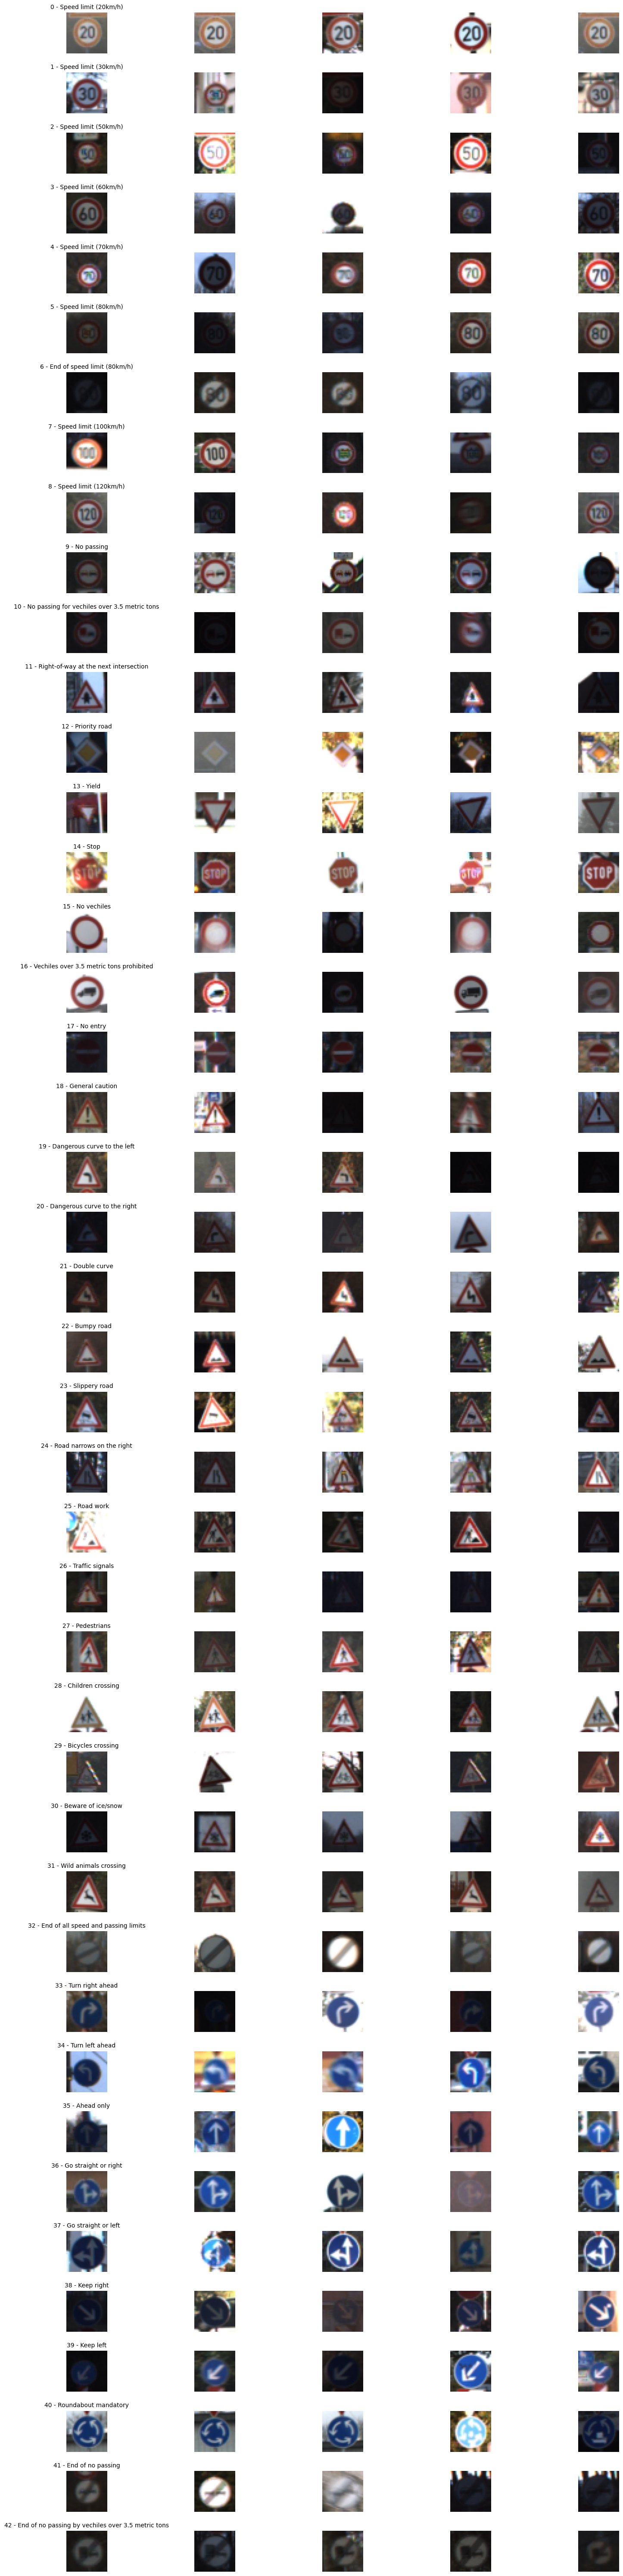

In [ ]:

# Example variables (replace with actual data)
num_classes = 43
cols = 5
fig, axes = plt.subplots(nrows=num_classes, ncols=cols, figsize=(15, 60))
fig.tight_layout()

# Assuming `data` is a DataFrame with a column "SignName" for class names
# Replace `x_train`, `y_train`, and `data` with your actual dataset
num_of_samples = []

for j in range(num_classes):  # Loop over classes
    x_selected = x_train[y_train == j]  # Select images of the current class
    num_of_samples.append(len(x_selected))  # Record sample count
    for i in range(cols):  # Loop to display images
        random_index = random.randint(0, len(x_selected) - 1)
        axes[j][i].imshow(x_selected[random_index, :, :], cmap=plt.get_cmap("gray"))
        axes[j][i].axis("off")

        # Add title to the first column only
        if i == 0:
            axes[j][i].set_title(f"{j} - {data.iloc[j]['SignName']}", fontsize=10)

plt.show()

<BarContainer object of 43 artists>

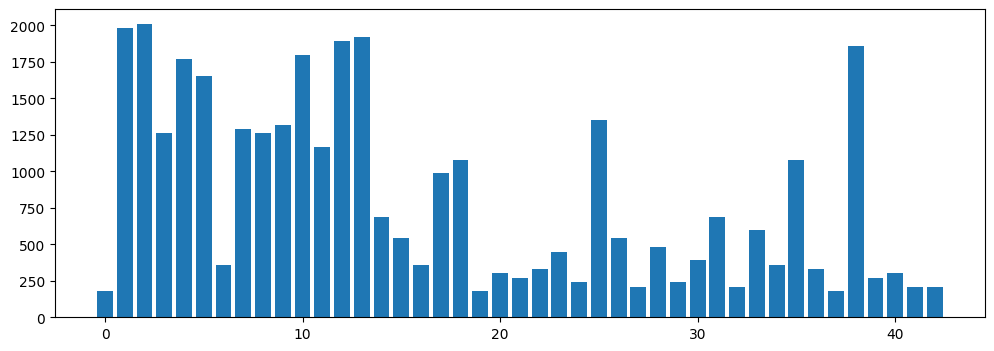

In [ ]:

plt.figure(figsize=(12,4))
plt.bar(range(len(num_of_samples)),num_of_samples)

In [ ]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [ ]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

In [ ]:
img=grayscale(x_train[1000])
img1=equalize(img)

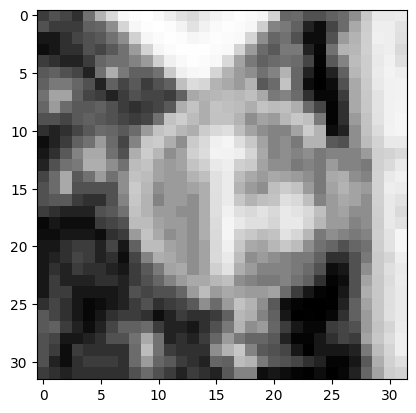

In [ ]:
plt.imshow(img1,cmap='gray')

In [ ]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img


In [ ]:
import numpy as np
x_train=np.array(list(map(preprocessing,x_train)))
x_val=np.array(list(map(preprocessing,x_val)))
x_test=np.array(list(map(preprocessing,x_test)))

In [ ]:

x_val.shape

(4410, 32, 32)

In [ ]:
x_train=x_train.reshape(34799, 32, 32,1)
x_val=x_val.reshape(4410,32, 32,1)
x_test=x_test.reshape(12630, 32, 32,1)

In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [ ]:
from ast import mod
def Len_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32, 32,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=Len_net()
model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val),verbose=1,shuffle=1,batch_size=400)